# 02. Neural network classification with PyTorch

Classification is a problem of predicting wheteher something is one thing or another (there can be multiple things as the options)
https://www.learnpytorch.io/02_pytorch_classification/

## 1. Make classification data and get it ready

In [1]:
conda install scikit-learn


Retrieving notices: ...working... done
Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
from sklearn.datasets import make_circles

# Make 1000 samples
n_samples = 1000

x, y = make_circles(n_samples, 
                    noise=0.03, random_state=42)



In [3]:
x[:10]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343],
       [-0.47964637,  0.67643477],
       [-0.01364836,  0.80334872],
       [ 0.77151327,  0.14775959],
       [-0.16932234, -0.79345575],
       [-0.1214858 ,  1.02150905]])

In [4]:
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

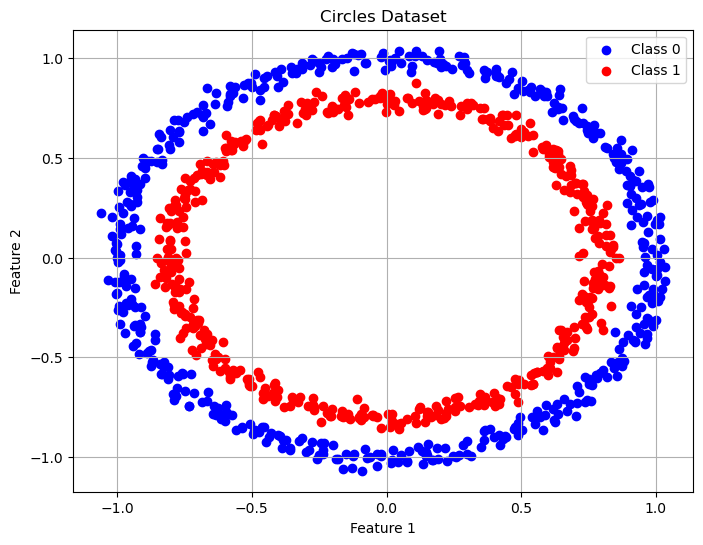

In [5]:
# Visualize our data
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(x[y == 0][:, 0], x[y == 0][:, 1], color='blue', label='Class 0')
plt.scatter(x[y == 1][:, 0], x[y == 1][:, 1], color='red', label='Class 1')
plt.title('Circles Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()

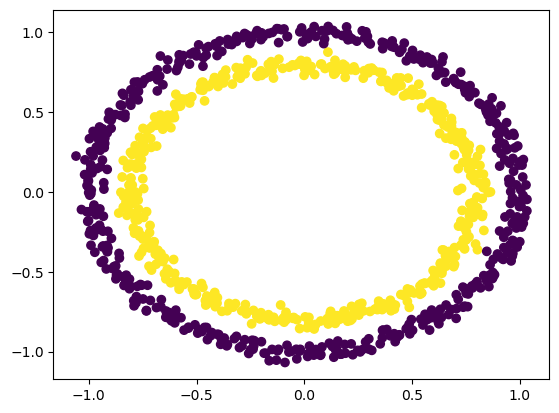

In [6]:
plt.scatter(x = x[:,0],
            y=x[:,1],
            c=y)

In [7]:
from sklearn.datasets import make_circles

n_samples = 1000

x, y = make_circles(n_samples=n_samples, noise=0.03, random_state=42)




In [8]:
!conda install pandas

Channels:
 - defaults
Platform: linux-64
Solving environment: done

# All requested packages already installed.



In [9]:
import pandas as pd

circles = pd.DataFrame({'X1': x[:,0],
                        'X2': x[:,1],
                        'label': y})

circles.head(10)

,X1,X2,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
5,-0.479646,0.676435,1
6,-0.013648,0.803349,1
7,0.771513,0.147760,1
8,-0.169322,-0.793456,1
9,-0.121486,1.021509,0


In [10]:
circles.label.value_counts()

label
1    500
0    500
Name: count, dtype: int64

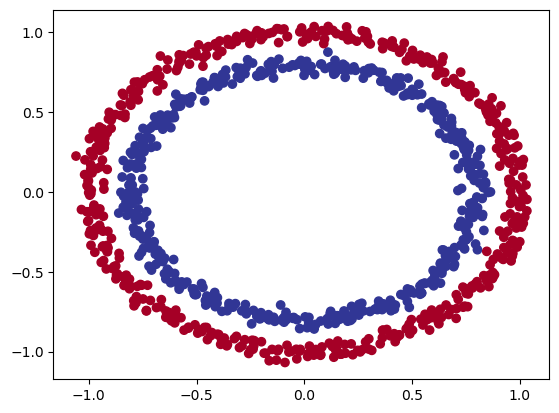

In [11]:
import matplotlib.pyplot as plt

plt.scatter(x = x[:,0],
            y= x[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

Note : The data we're working with is often referred to as toy dataset, a dataset that is small enough to experiment but still sizeable enough to practice the fundamentals

### 1.1 Check input and output shapes

In [12]:
x.shape, y.shape

((1000, 2), (1000,))

In [13]:
x

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [14]:
# View the first example of features and labels
X_sample = x[0]
y_sample = y[0]

print(f"Values for one sample of X:  {X_sample} and the same for Y {y_sample}")
print(f"Shapes for one sample of X: {X_sample.shape} and the same for y {y_sample.shape}")

Values for one sample of X:  [0.75424625 0.23148074] and the same for Y 1
Shapes for one sample of X: (2,) and the same for y ()


### 1.2 Turn data into tensors and create train and test splits

In [15]:

import torch
torch.__version__

'2.3.1'

In [16]:
# Turn data into tensors
X = torch.from_numpy(x).type(torch.float)
Y = torch.from_numpy(y).type(torch.float)

X[:5], Y[:5]



(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [17]:
X.dtype, Y.dtype, X.type, Y.type

(torch.float32, torch.float32, <function Tensor.type>, <function Tensor.type>)

In [18]:
# Split data into training and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [19]:
len(X_train), len(X_test)

(800, 200)

## 2. Building a model 

Let's build a model to classify our blue and red dots 

To do so, we want to:

1. Setup device agnostic code
2. Construct a model (by subclassing 'nn.Module')
3. Defining loss function and optimizer
4. Create a train and test loop

In [20]:
import torch
from torch import nn

# Setup device agnostic code
device= 'cuda' if torch.cuda.is_available() else 'cpu'

device


'cuda'

Now we've setup device agnostic code, let's create a model that:

1. Subclass 'nn.Module' (almost all models in Pytorch subclass nn.Module)
2. Create 2 'nn.Linear()' that are capable of handling the shapes of our data
3. Define a 'forward()' method that outlines a forward pass or forward computation of the model
4. Instantiate an instance of our model class and send it to the target device


In [21]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV0(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        #2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer1 = nn.Linear(in_features=2, out_features=5) # takes in 2 features and upscales to 5 features 
        self.layer2 = nn.Linear(in_features=5, out_features=1) # takes in 5 features from previous layer and ouputs a single feature (same shape as y)

    #3. Define a 'forward()' method that outlines a forward pass or forward computation of the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer2(self.layer1(x)) # x -> layer_1 -> layer_2 -> output
    
# 4. Instantiate an instance of our model class and send it to the target device
model_0 = CircleModelV0().to(device)
model_0

CircleModelV0(
  (layer1): Linear(in_features=2, out_features=5, bias=True)
  (layer2): Linear(in_features=5, out_features=1, bias=True)
)

In [22]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [23]:
model_0.state_dict()

OrderedDict([('layer1.weight',
              tensor([[ 0.4109,  0.0521],
                      [-0.1549,  0.5134],
                      [ 0.6279,  0.1540],
                      [-0.5381,  0.5588],
                      [-0.6758, -0.1753]], device='cuda:0')),
             ('layer1.bias',
              tensor([ 0.0977, -0.2117,  0.4414, -0.1609,  0.3528], device='cuda:0')),
             ('layer2.weight',
              tensor([[-0.4063, -0.1075, -0.2974, -0.1704,  0.2177]], device='cuda:0')),
             ('layer2.bias', tensor([0.0030], device='cuda:0'))])

In [24]:
# Let's replicate our model above using nn.Sequential()
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
).to(device)

model_0

Sequential(
  (0): Linear(in_features=2, out_features=5, bias=True)
  (1): Linear(in_features=5, out_features=1, bias=True)
)

In [25]:
model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.6911, -0.2972],
                      [-0.3199,  0.4614],
                      [-0.1553,  0.5519],
                      [-0.3156, -0.1574],
                      [ 0.0215,  0.5518]], device='cuda:0')),
             ('0.bias',
              tensor([-0.0705, -0.3038,  0.0103,  0.4998,  0.4574], device='cuda:0')),
             ('1.weight',
              tensor([[-0.0995,  0.0805, -0.4418,  0.0702, -0.1583]], device='cuda:0')),
             ('1.bias', tensor([-0.0677], device='cuda:0'))])

In [26]:
# Make predictions
with torch.inference_mode():
    untrained_predictions = model_0(X_test.to(device))

print(f"Length of predictions: {len(untrained_predictions)}, Shape: {untrained_predictions.shape}")
print(f"Length of test sample: {len(X_test)}, Shape: {X_test.shape}")
print(f"\nFirst 10 predictions: \n{torch.round(untrained_predictions[:10])}")
print(f"\nFirst 10 labels: \n{Y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test sample: 200, Shape: torch.Size([200, 2])

First 10 predictions: 
tensor([[-0.],
        [-0.],
        [-0.],
        [-0.],
        [0.],
        [0.],
        [-0.],
        [-0.],
        [-0.],
        [-0.]], device='cuda:0')

First 10 labels: 
tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.])


### 2.1 Setup loss function and optimizer

Which loss function or optimizer should u use?

Again this is problem specific

For example for regression you might want MAE or MSE (mean absolute error or mean squared error)

For classification you might binary cross entropy or categorical cross entropy

As a reminder, the loss function measures how wrong your models predictions are 

And for optimizers, two of the most common and useful optimizers are SGD and ADAM, however PyTorch has many builtin options 

For the loss function we're going to use 'torch.nn.BCEWithLogitsLoss()'



In [27]:
# Setup the loss function

#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function builtin

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)



In [28]:
# Calculate the accuracy - out of 100 examples, what percentage does our model get right?

def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true , y_pred).sum().item()
    acc = (correct / len(y_pred) ) * 100
    return acc

## 3. Train model

To train our model, we're going to build a training loop:
1. Forward Pass
2. Calculate the loss
3. Optimizer zero grad
4. Loss backward
5. Optimizer step (gradient descent)

### 3.1 Going from raw logits -> prediction probabilities -> prediction labels

Our model ouputs are going to be **Logits** .

We can convert these **logits** into **prediction probabilities** by passing them into some kind of activation function 
(e.g. sigmoid for binary classification and softmax for multiclass classification)

Then we can convert our model's prediction probabilities to **prediction labels** by either rounding them or taking the 
'argmax()'. Round 

In [29]:
# View the first 5 output of forward pass on test data
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test.to(device))[:5]
y_logits

tensor([[-0.3473],
        [-0.3901],
        [-0.1007],
        [-0.4177],
        [ 0.1126]], device='cuda:0')

In [30]:
Y_test[:5]

tensor([1., 0., 1., 0., 1.])

In [31]:
# Use the sigmoid activation function on our model logits to turn them into prediction probabilities
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4140],
        [0.4037],
        [0.4748],
        [0.3971],
        [0.5281]], device='cuda:0')

For our prediction probability values, we need to perform a range style rounding on them:
* 'y_pred_probs' >= 0.5 'y=1' (class 1)
* 'y_pred_probs' < 0.5 'y=0' (class 0)

In [32]:
torch.round(y_pred_probs)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [1.]], device='cuda:0')

### 3.2 Build a training loop

In [33]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put the data on target device
X_test, Y_test = X_test.to(device), Y_test.to(device)
X_train, Y_train = X_train.to(device), Y_train.to(device)

# Set the number of epochs
epochs = 1000

for epoch in range(epochs):
    ### Training
    model_0.train()

    #1. Forward Pass
    y_logits = model_0(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits)) #turn logits into pred probs into pred labels

    #2. Calculate Loss/Accuracy
    loss = loss_fn(y_logits, Y_train) #nn.BCEWithLogitsloss expects raw logits as input
    acc = accuracy_fn(y_true=Y_train, y_pred=y_preds)

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss Backward (back propogation)
    loss.backward()

    #5. Optimizer step
    optimizer.step()


    ### Testing
    model_0.eval()
    with torch.inference_mode():
        # 1. Forward Pass
        test_logits = model_0(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        #2. Calculate the test loss/accuracy
        test_loss = loss_fn(test_logits, Y_test)
        test_acc = accuracy_fn(y_true=Y_test, y_pred=test_preds)

    # Print out what's happening
    if epoch%10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc}% | Test Loss: {test_loss} | Test Accuracy: {test_acc}%")

Epoch: 0 | Loss: 0.7005810141563416 | Accuracy: 46.75% | Test Loss: 0.6946461796760559 | Test Accuracy: 50.0%
Epoch: 10 | Loss: 0.6982351541519165 | Accuracy: 48.5% | Test Loss: 0.6930863857269287 | Test Accuracy: 51.5%
Epoch: 20 | Loss: 0.6968594193458557 | Accuracy: 48.5% | Test Loss: 0.6924207806587219 | Test Accuracy: 51.0%
Epoch: 30 | Loss: 0.6959609985351562 | Accuracy: 48.625% | Test Loss: 0.692164957523346 | Test Accuracy: 49.5%
Epoch: 40 | Loss: 0.695324718952179 | Accuracy: 49.125% | Test Loss: 0.6921078562736511 | Test Accuracy: 50.0%
Epoch: 50 | Loss: 0.6948492527008057 | Accuracy: 49.5% | Test Loss: 0.6921520829200745 | Test Accuracy: 48.5%
Epoch: 60 | Loss: 0.6944820284843445 | Accuracy: 49.125% | Test Loss: 0.6922498941421509 | Test Accuracy: 49.0%
Epoch: 70 | Loss: 0.69419264793396 | Accuracy: 49.375% | Test Loss: 0.6923760771751404 | Test Accuracy: 50.0%
Epoch: 80 | Loss: 0.6939620971679688 | Accuracy: 49.5% | Test Loss: 0.6925164461135864 | Test Accuracy: 50.0%
Epoch:

## 4. Make predictions and evaluate the model

From the metrics it looks like our model isn't learning anything...

So to inspect it, let's make some predictions and make them visual!

In other words, visualize visualize visualize

To do so, we're going to import a function called 'plot_decision_boundary()' 

In [34]:
import requests 
from pathlib import Path

# Download helper functions from Learn Pytorch repo (if it's not already downloaded)

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists")

else:
    print("Download helper functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

    with open("helper_functions.py", 'wb') as f:
        f.write(request.content)


from helper_functions import plot_predictions, plot_decision_boundary

helper_functions.py already exists


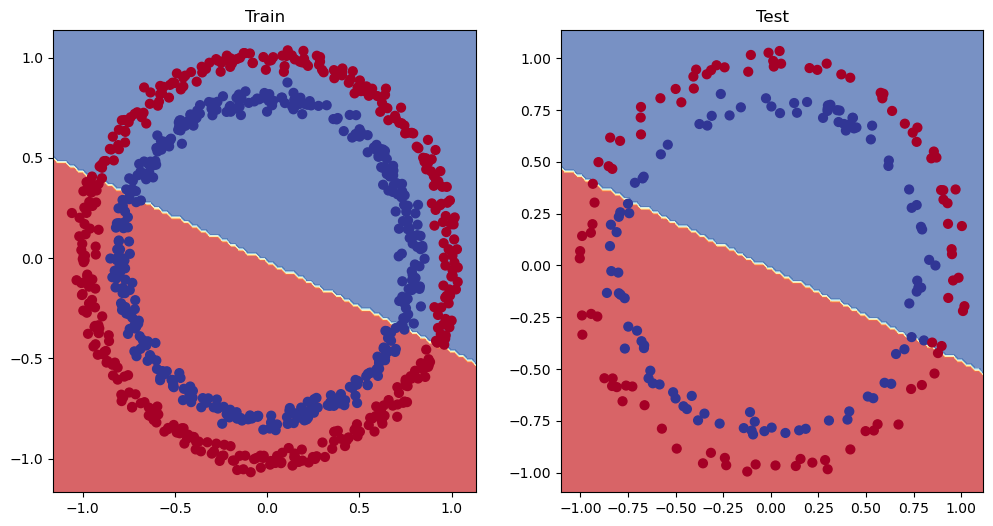

In [35]:
# Plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, Y_test)

## 5. Improving a model (from a model perspective)

* Add more layers - (Give the model more chances to learn patterns about the data)
* Add more hidden units - go from 5 hidden units to 10 hidden units
* Fit for longer (more epochs)
* Changing the activation function
* Change the learning rate 
* Change the loss function

These options are all from a model's perspective because they deal directly with the model, rather than the data.

And these options are all values we (as machine learning engineers and data scientists) can change, they are 
referred as **hyperparameters**.

Let's try and improve our model by:
* Adding more hidden units : 5 -> 10
* Increase the number of layers: 2 -> 3
* Increase the number of epochs 100 -> 1000


In [36]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV1(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        #2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer1 = nn.Linear(in_features=2, out_features=10) 
        self.layer2 = nn.Linear(in_features=10, out_features=10)
        self.layer3 = nn.Linear(in_features=10, out_features=1)  

    #3. Define a 'forward()' method that outlines a forward pass or forward computation of the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        #z = self.layer1(x)
        #z = self.layer2(z)
        #z = self.layer3(z)

        #this way of writing operation increases speed behind the scenes
        return self.layer3(self.layer2(self.layer1(x))) # x -> layer_1 -> layer_2 -> layer_3 -> output
    
# 4. Instantiate an instance of our model class and send it to the target device
model_1 = CircleModelV1().to(device)
model_1

CircleModelV1(
  (layer1): Linear(in_features=2, out_features=10, bias=True)
  (layer2): Linear(in_features=10, out_features=10, bias=True)
  (layer3): Linear(in_features=10, out_features=1, bias=True)
)

In [37]:
# Setup the loss function

#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function builtin

optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [38]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put the data on target device
X_test, Y_test = X_test.to(device), Y_test.to(device)
X_train, Y_train = X_train.to(device), Y_train.to(device)

# Set the number of epochs
epochs = 1000

for epoch in range(epochs):
    ### Training
    model_1.train()

    #1. Forward Pass
    y_logits = model_1(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits)) #turn logits into pred probs into pred labels

    #2. Calculate Loss/Accuracy
    loss = loss_fn(y_logits, Y_train) #nn.BCEWithLogitsloss expects raw logits as input
    acc = accuracy_fn(y_true=Y_train, y_pred=y_preds)

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss Backward (back propogation)
    loss.backward()

    #5. Optimizer step
    optimizer.step()


    ### Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward Pass
        test_logits = model_1(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        #2. Calculate the test loss/accuracy
        test_loss = loss_fn(test_logits, Y_test)
        test_acc = accuracy_fn(y_true=Y_test, y_pred=test_preds)

    # Print out what's happening
    if epoch%100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc}% | Test Loss: {test_loss} | Test Accuracy: {test_acc}%")

Epoch: 0 | Loss: 0.6939550638198853 | Accuracy: 50.875% | Test Loss: 0.6926102042198181 | Test Accuracy: 51.0%
Epoch: 100 | Loss: 0.6939550638198853 | Accuracy: 50.875% | Test Loss: 0.6926102042198181 | Test Accuracy: 51.0%
Epoch: 200 | Loss: 0.6939550638198853 | Accuracy: 50.875% | Test Loss: 0.6926102042198181 | Test Accuracy: 51.0%
Epoch: 300 | Loss: 0.6939550638198853 | Accuracy: 50.875% | Test Loss: 0.6926102042198181 | Test Accuracy: 51.0%
Epoch: 400 | Loss: 0.6939550638198853 | Accuracy: 50.875% | Test Loss: 0.6926102042198181 | Test Accuracy: 51.0%
Epoch: 500 | Loss: 0.6939550638198853 | Accuracy: 50.875% | Test Loss: 0.6926102042198181 | Test Accuracy: 51.0%


Epoch: 600 | Loss: 0.6939550638198853 | Accuracy: 50.875% | Test Loss: 0.6926102042198181 | Test Accuracy: 51.0%
Epoch: 700 | Loss: 0.6939550638198853 | Accuracy: 50.875% | Test Loss: 0.6926102042198181 | Test Accuracy: 51.0%
Epoch: 800 | Loss: 0.6939550638198853 | Accuracy: 50.875% | Test Loss: 0.6926102042198181 | Test Accuracy: 51.0%
Epoch: 900 | Loss: 0.6939550638198853 | Accuracy: 50.875% | Test Loss: 0.6926102042198181 | Test Accuracy: 51.0%


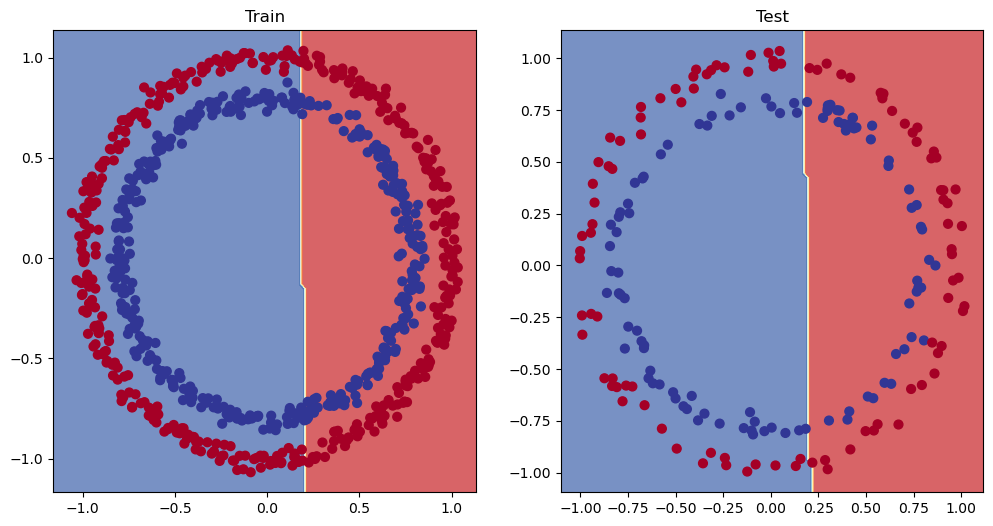

In [39]:
# Plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, Y_test)

### 5.1 Preparing data to see if our data fits a straight line
One way to troubleshoot to a larger problem is to test out a smaller problem

In [40]:
# Create *known* parameters
weight = 0.7
bias = 0.3 

# Create
start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim = 1)

y = weight * X + bias

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X , y = X.to(device), y.to(device)

In [41]:
# Create a train/test split

train_split = int(0.8 * len(X))
#train_split

X_train , Y_train = X[ : train_split], y[ : train_split]
X_test, Y_test = X[train_split : ], y [train_split : ]

X_train, Y_train

len(X_train), len(Y_train), len(X_test), len(Y_test)

(40, 40, 10, 10)

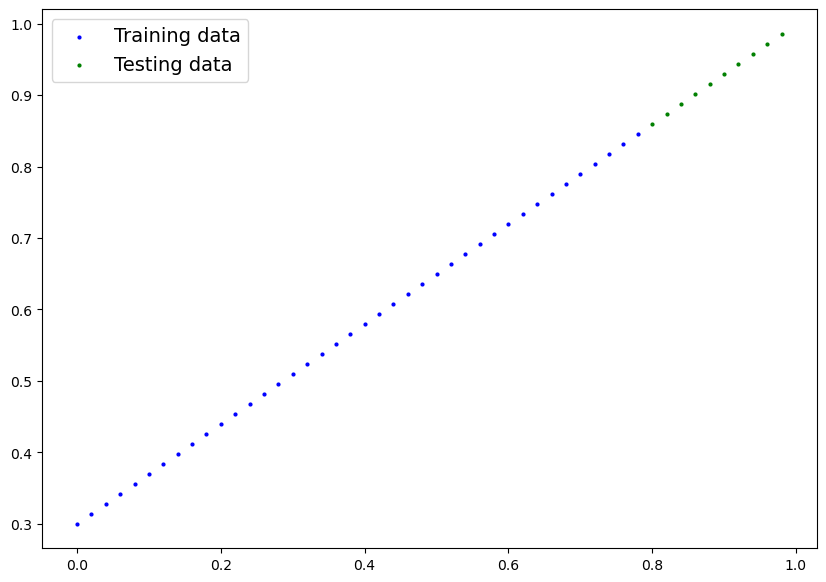

In [42]:
plot_predictions(train_data=X_train.to('cpu'), 
                 train_labels=Y_train.to('cpu'), 
                 test_data=X_test.to('cpu'), 
                 test_labels=Y_test.to('cpu'))

### 5.2 Adjusting model_1 to fit a straight line

In [43]:
model_2 = nn.Sequential(
    nn.Linear(in_features=1, out_features=10),
    nn.Linear(in_features=10, out_features=10),
    nn.Linear(in_features=10, out_features=1)
).to(device)

model_2

Sequential(
  (0): Linear(in_features=1, out_features=10, bias=True)
  (1): Linear(in_features=10, out_features=10, bias=True)
  (2): Linear(in_features=10, out_features=1, bias=True)
)

In [44]:
# Loss and optimizer
loss_fn = nn.L1Loss()

# Setup an optimizer (stochastic gradient descent )
optimizer = torch.optim.SGD(params= model_2.parameters(), 
                            lr = 0.01) 


In [45]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)


# An epoch is one loop through the data
epochs = 1000

# 0. Loop through the data
for epoch in range(epochs):
    # set the model to the training mode
    
    model_2.train() # train mode in Pytorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_2(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, Y_train)
    

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropogation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)      
    optimizer.step() # by default how the optimizer changes will accumulate through the loop so... we have to zero them above step 3 for the next iteration of the loop 

    ### Testing
    model_2.eval() # turns off gradient tracking / turns off different settings in the model not needed for evaluation / testing (dropout / batch norm layers)

    with torch.inference_mode():

      #1. do forward pass
      test_pred = model_2(X_test)

      #2. Calculate the loss
      test_loss = loss_fn(test_pred, Y_test)

    # Print out what's happening
    if epoch % 100 == 0:

      print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    


Epoch: 0 | Loss: 0.7579175233840942 | Test loss: 0.9092822074890137
Epoch: 100 | Loss: 0.018259182572364807 | Test loss: 0.03651594743132591


Epoch: 200 | Loss: 0.015105249360203743 | Test loss: 0.04467190057039261
Epoch: 300 | Loss: 0.01400219090282917 | Test loss: 0.043150193989276886
Epoch: 400 | Loss: 0.013945779763162136 | Test loss: 0.044606804847717285
Epoch: 500 | Loss: 0.013770771212875843 | Test loss: 0.04351247102022171
Epoch: 600 | Loss: 0.013490437529981136 | Test loss: 0.04260420426726341
Epoch: 700 | Loss: 0.013118005357682705 | Test loss: 0.041861098259687424
Epoch: 800 | Loss: 0.012665897607803345 | Test loss: 0.04126371815800667
Epoch: 900 | Loss: 0.012157803401350975 | Test loss: 0.038322944194078445


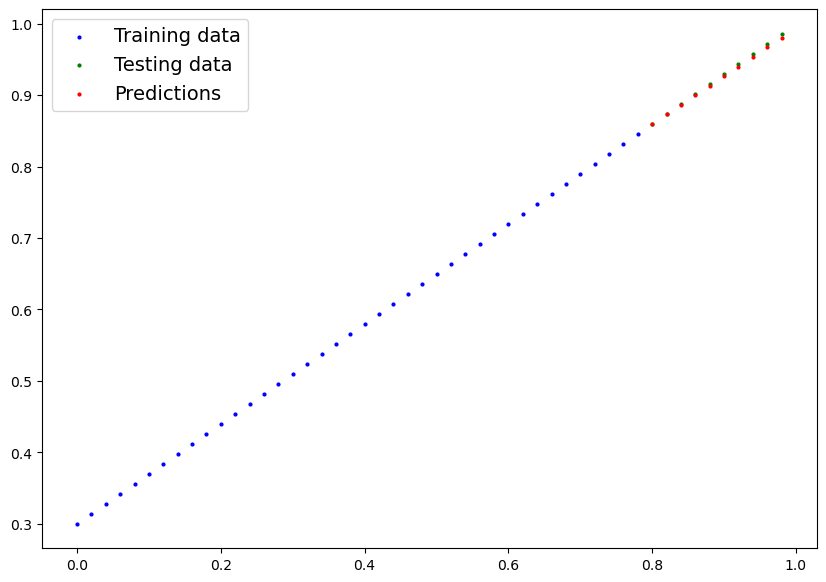

In [46]:
model_2.eval()
with torch.inference_mode():
    y_preds= model_2(X_test)

plot_predictions(train_data=X_train.cpu(), 
                 train_labels=Y_train.cpu(), 
                 test_data=X_test.cpu(), 
                 test_labels=Y_test.cpu(),
                 predictions=y_preds.cpu())

## 6. The missing piece: non-linearity

"What patterns could you draw if you were given an infinite amount of a straight and non-straight lines?"

Or in machine learning terms, an infinite (but really it is finite) of linear and non linear functions

### 6.1 Recreating non linear data (red and blue circles)

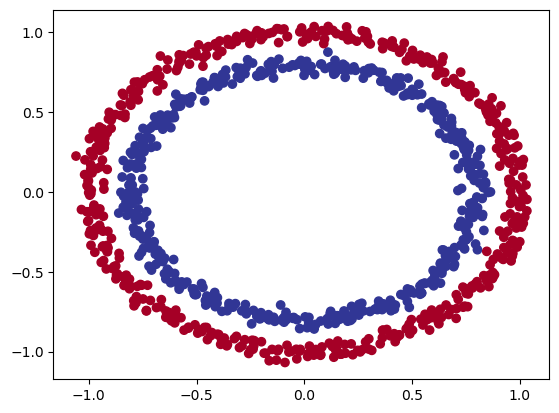

In [47]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Make 1000 samples
n_samples = 1000

X, Y = make_circles(n_samples, 
                    noise=0.03, random_state=42)

plt.scatter( x = X[:, 0], y = X[:, 1], c = Y, cmap=plt.cm.RdYlBu)



In [48]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float)
Y = torch.from_numpy(Y).type(torch.float)


In [49]:
# Split data into training and test splits
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

### 6.2 Building a model with non-linearity

* Linear = straight linear
* non-linear = non-straight lines

Artificial neural networks are a large combination of ;inear and non linear functions to find patterns in the data

In [50]:
# 1. Construct a model that subclasses nn.Module
class CircleModelV2(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)

        #2. Create 2 nn.Linear layers capable of handling the shapes of our data
        self.layer1 = nn.Linear(in_features=2, out_features=64) 
        self.layer2 = nn.Linear(in_features=64, out_features=64)
        self.layer3 = nn.Linear(in_features=64, out_features=1)  
        self.relu = nn.ReLU()

    #3. Define a 'forward()' method that outlines a forward pass or forward computation of the model
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        #z = self.layer1(x)
        #z = self.relu(z)
        #z = self.layer2(z)
        #z = self.relu(z)
        #z = self.layer3(z)
        

        #this way of writing operation increases speed behind the scenes
        return self.layer3(self.relu(self.layer2(self.relu(self.layer1(x))))) 
    
# 4. Instantiate an instance of our model class and send it to the target device
model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer1): Linear(in_features=2, out_features=64, bias=True)
  (layer2): Linear(in_features=64, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
)

In [51]:
# Setup the loss function

#loss_fn = nn.BCELoss() # BCELoss = requires inputs to have gone through the sigmoid activation function prior to input to BCELoss
loss_fn = nn.BCEWithLogitsLoss() # BCEWithLogitsLoss = sigmoid activation function builtin

optimizer = torch.optim.SGD(params=model_3.parameters(), lr=0.01)

### 6.3 Training a model with non linearity

In [52]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put the data on target device
X_test, Y_test = X_test.to(device), Y_test.to(device)
X_train, Y_train = X_train.to(device), Y_train.to(device)

# Set the number of epochs
epochs = 6000

for epoch in range(epochs):
    ### Training
    model_3.train()

    #1. Forward Pass
    y_logits = model_3(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits)) #turn logits into pred probs into pred labels

    #2. Calculate Loss/Accuracy
    loss = loss_fn(y_logits, Y_train) #nn.BCEWithLogitsloss expects raw logits as input
    acc = accuracy_fn(y_true=Y_train, y_pred=y_preds)

    #3. Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss Backward (back propogation)
    loss.backward()

    #5. Optimizer step
    optimizer.step()


    ### Testing
    model_3.eval()
    with torch.inference_mode():
        # 1. Forward Pass
        test_logits = model_3(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        #2. Calculate the test loss/accuracy
        test_loss = loss_fn(test_logits, Y_test)
        test_acc = accuracy_fn(y_true=Y_test, y_pred=test_preds)

    # Print out what's happening
    if epoch%100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss} | Accuracy: {acc}% | Test Loss: {test_loss} | Test Accuracy: {test_acc}%")

Epoch: 0 | Loss: 0.6917896270751953 | Accuracy: 47.375% | Test Loss: 0.694421648979187 | Test Accuracy: 46.5%


Epoch: 100 | Loss: 0.6901028156280518 | Accuracy: 52.0% | Test Loss: 0.6929258704185486 | Test Accuracy: 53.0%
Epoch: 200 | Loss: 0.6889651417732239 | Accuracy: 53.0% | Test Loss: 0.6920425295829773 | Test Accuracy: 51.0%
Epoch: 300 | Loss: 0.6878905892372131 | Accuracy: 55.25% | Test Loss: 0.6912223696708679 | Test Accuracy: 52.0%
Epoch: 400 | Loss: 0.6868197321891785 | Accuracy: 55.625% | Test Loss: 0.6904276609420776 | Test Accuracy: 53.0%
Epoch: 500 | Loss: 0.6857088804244995 | Accuracy: 56.99999999999999% | Test Loss: 0.6895866394042969 | Test Accuracy: 54.50000000000001%
Epoch: 600 | Loss: 0.6845626831054688 | Accuracy: 58.12500000000001% | Test Loss: 0.6887204051017761 | Test Accuracy: 53.5%
Epoch: 700 | Loss: 0.6833652853965759 | Accuracy: 59.75% | Test Loss: 0.6878198385238647 | Test Accuracy: 54.0%
Epoch: 800 | Loss: 0.6821779012680054 | Accuracy: 61.375% | Test Loss: 0.6869451999664307 | Test Accuracy: 54.50000000000001%
Epoch: 900 | Loss: 0.6809439063072205 | Accuracy: 62.1

### 6.4 Evaluating a model trained with non linear activation functios

In [53]:
model_3.eval()
with torch.inference_mode():
    # 1. Forward Pass
    logits = model_3(X_test).squeeze()
    y_preds = torch.round(torch.sigmoid(logits))

y_preds[:10], Y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

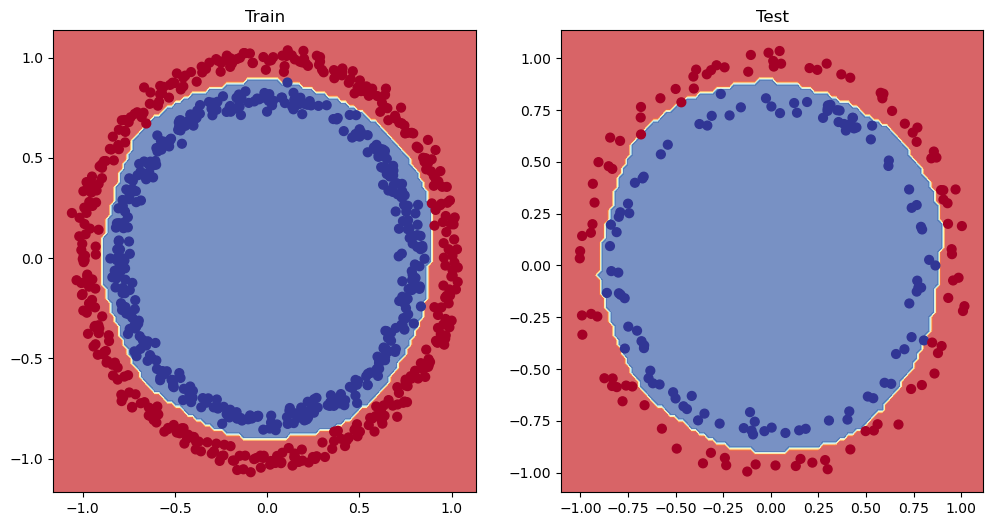

In [54]:
# Plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, Y_test)

## 7. Replicating non-linear activation functions
Neural networks, rather than us telling the model what to learn, we give it the tools to discover patterns in data and it tries to figure out patterns on its own

And these tools are linear and non linear functions

In [55]:

A = torch.arange(-10, 10, 1, dtype=torch.float32)
A.dtype

torch.float32

In [56]:
A

tensor([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,   1.,
          2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.])

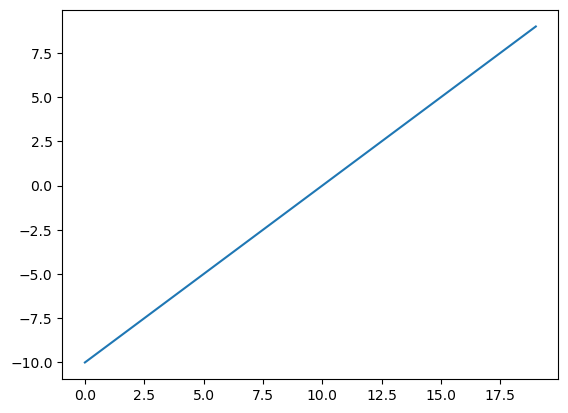

In [57]:
#Visualize the tensor
plt.plot(A)

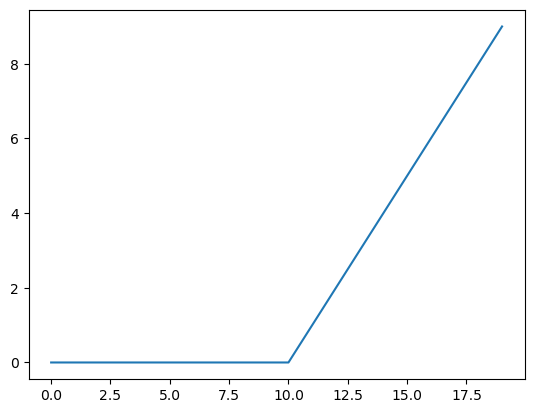

In [58]:
plt.plot(torch.relu(A))

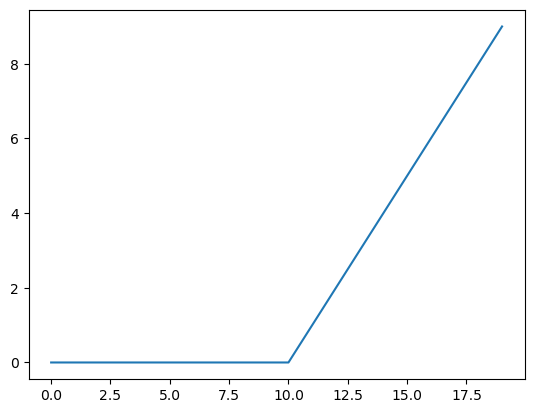

In [59]:
def relu(x: torch.Tensor) -> torch.Tensor :
    return torch.maximum(torch.tensor(0), x) # inputs must be tensor

plt.plot(relu(A))

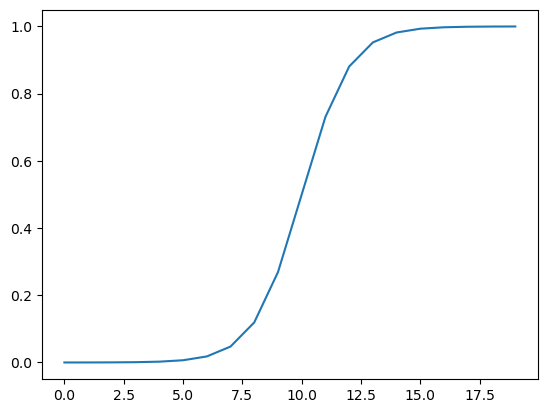

In [60]:
# Now let's do the same for sigmoid
def sigmoid(x):
    return 1 / (1 + torch.exp(-x))

plt.plot(sigmoid(A))

## 8. Complete code in one step

Epoch: 0 | Loss: 0.6918 | Test Loss: 0.6943
Epoch: 100 | Loss: 0.6797 | Test Loss: 0.6850
Epoch: 200 | Loss: 0.6617 | Test Loss: 0.6707
Epoch: 300 | Loss: 0.6231 | Test Loss: 0.6372
Epoch: 400 | Loss: 0.5337 | Test Loss: 0.5590
Epoch: 500 | Loss: 0.3749 | Test Loss: 0.4144
Epoch: 600 | Loss: 0.2117 | Test Loss: 0.2540
Epoch: 700 | Loss: 0.1263 | Test Loss: 0.1637
Epoch: 800 | Loss: 0.0760 | Test Loss: 0.1068
Epoch: 900 | Loss: 0.0512 | Test Loss: 0.0777
Epoch: 1000 | Loss: 0.0373 | Test Loss: 0.0609
Epoch: 1100 | Loss: 0.0289 | Test Loss: 0.0505
Epoch: 1200 | Loss: 0.0233 | Test Loss: 0.0433
Epoch: 1300 | Loss: 0.0194 | Test Loss: 0.0380
Epoch: 1400 | Loss: 0.0165 | Test Loss: 0.0341
Epoch: 1500 | Loss: 0.0144 | Test Loss: 0.0311
Epoch: 1600 | Loss: 0.0127 | Test Loss: 0.0286
Epoch: 1700 | Loss: 0.0113 | Test Loss: 0.0265
Epoch: 1800 | Loss: 0.0102 | Test Loss: 0.0248
Epoch: 1900 | Loss: 0.0092 | Test Loss: 0.0233
Epoch: 2000 | Loss: 0.0084 | Test Loss: 0.0220


Epoch: 2100 | Loss: 0.0078 | Test Loss: 0.0209
Epoch: 2200 | Loss: 0.0072 | Test Loss: 0.0198
Epoch: 2300 | Loss: 0.0067 | Test Loss: 0.0189
Epoch: 2400 | Loss: 0.0062 | Test Loss: 0.0181
Epoch: 2500 | Loss: 0.0059 | Test Loss: 0.0174
Epoch: 2600 | Loss: 0.0055 | Test Loss: 0.0167
Epoch: 2700 | Loss: 0.0052 | Test Loss: 0.0161
Epoch: 2800 | Loss: 0.0049 | Test Loss: 0.0155
Epoch: 2900 | Loss: 0.0047 | Test Loss: 0.0150
Epoch: 3000 | Loss: 0.0045 | Test Loss: 0.0146
Epoch: 3100 | Loss: 0.0043 | Test Loss: 0.0141
Epoch: 3200 | Loss: 0.0041 | Test Loss: 0.0137
Epoch: 3300 | Loss: 0.0039 | Test Loss: 0.0133
Epoch: 3400 | Loss: 0.0037 | Test Loss: 0.0130
Epoch: 3500 | Loss: 0.0036 | Test Loss: 0.0126
Epoch: 3600 | Loss: 0.0034 | Test Loss: 0.0123
Epoch: 3700 | Loss: 0.0033 | Test Loss: 0.0120
Epoch: 3800 | Loss: 0.0032 | Test Loss: 0.0117
Epoch: 3900 | Loss: 0.0031 | Test Loss: 0.0115
Epoch: 4000 | Loss: 0.0030 | Test Loss: 0.0112
Epoch: 4100 | Loss: 0.0029 | Test Loss: 0.0110
Epoch: 4200 |

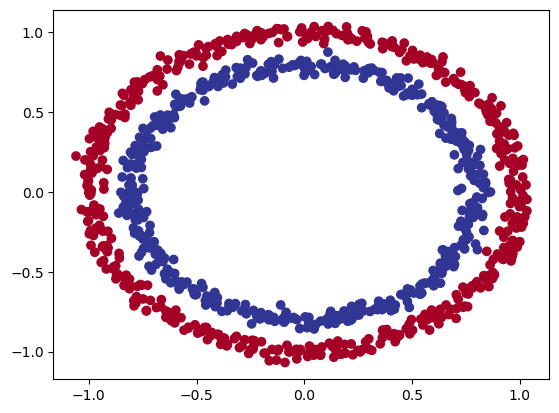

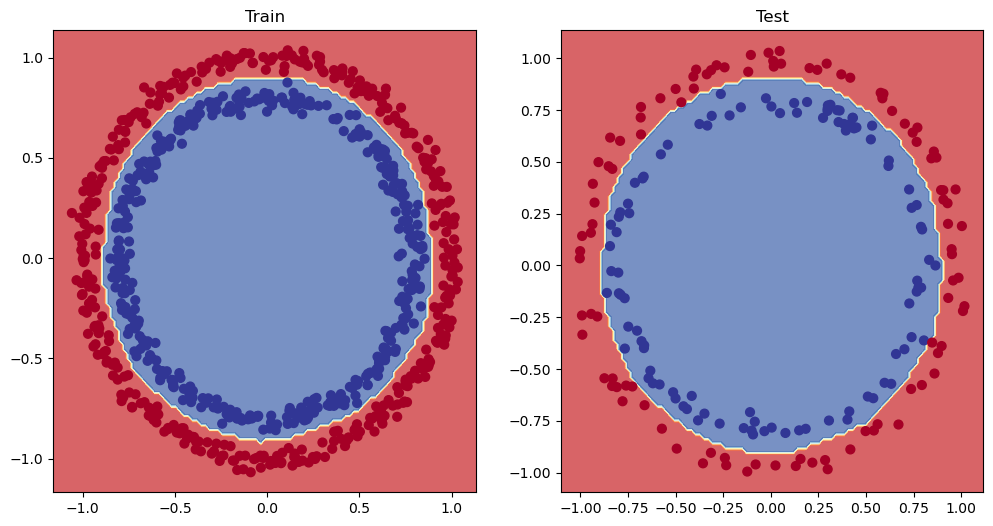

In [61]:
import torch
from torch import nn
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from helper_functions import plot_decision_boundary



# DEVICE AGNOSTIC CODE
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# DATA PREPARATION
n_samples = 1000
X, Y = make_circles(n_samples=n_samples,
                       noise=0.03,
                       random_state=42)

# CONVERT DATA TO TENSORS
X = torch.from_numpy(X).type(torch.float).to(device)
Y = torch.from_numpy(Y).type(torch.float).to(device)

# VISUALIZING CIRCLES
plt.scatter(x= X[:,0].cpu(), y= X[:, 1].cpu(), c= Y.cpu(), cmap= plt.cm.RdYlBu)

# RANDOM SEED
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# BUILDING OUR MODEL
class CircleModelV3(nn.Module):
    def __init__(self) :
        super().__init__()

        self.all_layers = nn.Sequential(
        nn.Linear(in_features= 2, out_features= 64),
        nn.ReLU(),
        nn.Linear(in_features= 64, out_features= 64),
        nn.ReLU(),
        nn.Linear(in_features= 64, out_features= 1)
        )
        
    def forward(self, x: torch.Tensor):
        return self.all_layers(x)
    

# INSTANCIATING OUR MODEL
model_4 = CircleModelV3().to(device)
#print("Our model:", model_4)
#print(model_4.state_dict())



# LOSS FUNCTION AND OPTIMIZER
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_4.parameters(), 
                            lr = 0.1)


# SPLITTING DATA INTO TRAINING AND TESTING SAMPLES
X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size= 0.2, random_state=42)
#print(len(X_train), len(X_test), len(Y_train), len(Y_test) )
#print(X_train)


# WRITING OUR TRAINING AND TESTING LOOP
epochs = 7000

# TRAINING LOOP
for epoch in range(epochs):
    model_4.train()

    y_logits = model_4(X_train).squeeze()
    #print("y_logits: ", y_logits, y_logits.shape)
    y_preds = torch.round(torch.sigmoid(y_logits))

    loss = loss_fn(y_logits, Y_train)

    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    # TESTING LOOP
    model_4.eval()
    with torch.inference_mode():
        test_logits = model_4(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits, Y_test)

    
    if epoch%100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.4f} | Test Loss: {test_loss:.4f}")


# EVALUATION
model_4.eval()
with torch.inference_mode():
        test_logits = model_4(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))


# Plot decision boundary of the model
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_train, Y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_test, Y_test)







In [62]:
!nvidia-smi

Wed Aug 21 15:18:04 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.89.02    Driver Version: 525.89.02    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:1A:00.0 Off |                  N/A |
| 30%   34C    P2    99W / 350W |  23818MiB / 24576MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  Off  | 00000000:1B:00.0 Off |                  N/A |
| 30%   

In [63]:
device

'cuda'

## 9. Putting it all togeher with a muticlass classification
* Binary Classification = one thing or another (cat vs dog, spam vs not spam)
* Multiclass classification = more than one thing or another (cat vs dog vs chicken)

### 9.1 Creating a toy multiclass dataset

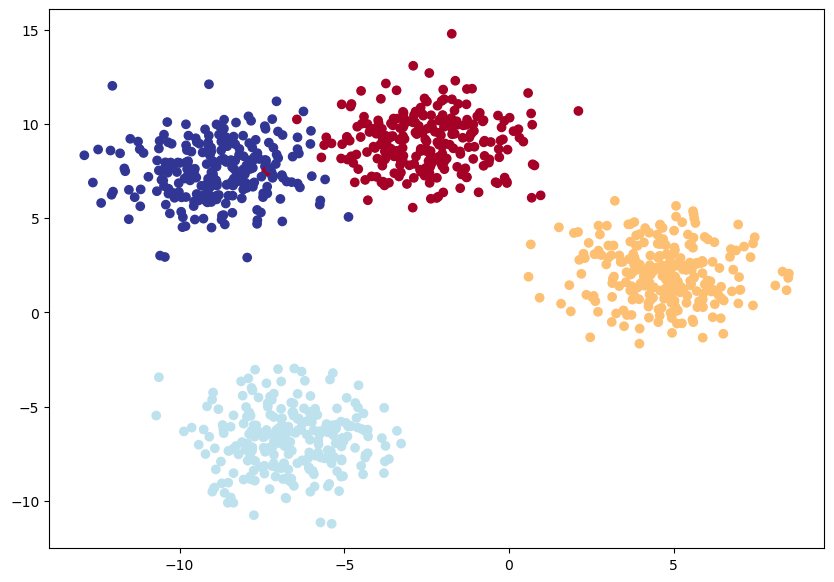

In [75]:
import torch
from torch import nn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from helper_functions import plot_decision_boundary 

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 42

# 1. Create a multiclass data
X_blob, y_blob = make_blobs(n_samples=1000, 
                            n_features=NUM_FEATURES,
                            centers=NUM_CLASSES,
                            cluster_std= 1.5,
                            random_state=RANDOM_SEED)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.long)

# 3. Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X_blob, 
                                                    y_blob,
                                                    test_size=0.2,
                                                    random_state=RANDOM_SEED)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0].cpu(), X_blob[:, 1].cpu(), c = y_blob.cpu(), cmap = plt.cm.RdYlBu)

### 9.2 Building a multi -class classification model

In [76]:
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units = 8) :
        super().__init__()

        self.all_layers = nn.Sequential(
        nn.Linear(in_features= input_features, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= hidden_units),
        nn.ReLU(),
        nn.Linear(in_features= hidden_units, out_features= output_features)
        )
        
    def forward(self, x: torch.Tensor):
        return self.all_layers(x)
    

# INSTANCIATING OUR MODEL
model_5 = BlobModel(input_features=2, 
                  output_features=4).to(device)
model_5

BlobModel(
  (all_layers): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): ReLU()
    (2): Linear(in_features=8, out_features=8, bias=True)
    (3): ReLU()
    (4): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [77]:
X_train.shape, Y_train[:5]

(torch.Size([800, 2]), tensor([1, 0, 2, 2, 0]))

In [78]:
torch.unique(Y_train)

tensor([0, 1, 2, 3])

### 9.3 Create a loss function and optimizer for multiclass model

In [79]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_5.parameters(),
                            lr= 0.1)

### 9.4 Getting prediction probabilities for a multi-class PyTorch model
Alright, we've got a loss function and optimizer ready, and we're ready to train our model but before we do let's do a single forward pass with our model to see if it works.

In [80]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_5(X_train.to(device))[:5]

tensor([[-0.7586, -0.6810, -1.5180, -1.1178],
        [-0.2398, -1.2335, -0.9858, -0.2899],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [ 0.2391, -0.2472,  0.1494,  0.0213],
        [-0.1214, -0.9804, -0.6918, -0.1923]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [81]:
# How many elements in a single prediction sample?
model_5(X_train.to(device))[0].shape, NUM_CLASSES

(torch.Size([4]), 4)

Wonderful, our model is predicting one value for each class that we have.

Do you remember what the raw outputs of our model are called?

Hint: it rhymes with "frog splits" (no animals were harmed in the creation of these materials).

If you guessed logits, you'd be correct.

So right now our model is outputing logits but what if we wanted to figure out exactly which label is was giving the sample?

As in, how do we go from logits -> prediction probabilities -> prediction labels just like we did with the binary classification problem?

That's where the softmax activation function comes into play.

The softmax function calculates the probability of each prediction class being the actual predicted class compared to all other possible classes.

If this doesn't make sense, let's see in code.

In [82]:
# Make prediction logits with model
y_logits = model_5(X_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[-0.7646, -0.7412, -1.5777, -1.1376],
        [-0.0973, -0.9431, -0.5963, -0.1371],
        [ 0.2528, -0.2379,  0.1882, -0.0066],
        [-0.4134, -0.5204, -0.9303, -0.6963],
        [-0.3118, -1.3736, -1.1991, -0.3834]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.3169, 0.3244, 0.1405, 0.2182],
        [0.3336, 0.1432, 0.2026, 0.3206],
        [0.3011, 0.1843, 0.2823, 0.2323],
        [0.3078, 0.2766, 0.1836, 0.2320],
        [0.3719, 0.1286, 0.1532, 0.3463]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [83]:
# Sum the first sample output of the softmax activation function 
torch.sum(y_pred_probs[0])

tensor(1., device='cuda:0', grad_fn=<SumBackward0>)

In [84]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.3169, 0.3244, 0.1405, 0.2182], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(1, device='cuda:0')


### 9.5 Building a training loop

In order to evaluate and train and test our model, we need to convert our model's outputs (logits) to prediction probabilities 
and then to prediction labels

In [85]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 100

# Put data to target device
X_blob_train, y_blob_train = X_train.to(device), Y_train.to(device)
X_blob_test, y_blob_test = X_test.to(device), Y_test.to(device)

for epoch in range(epochs):
    ### Training
    model_5.train()

    # 1. Forward pass
    y_logits = model_5(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_5.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_5(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 1.15883, Acc: 40.38% | Test Loss: 1.07554, Test Acc: 48.00%
Epoch: 10 | Loss: 0.64476, Acc: 96.75% | Test Loss: 0.66069, Test Acc: 97.50%
Epoch: 20 | Loss: 0.42535, Acc: 98.50% | Test Loss: 0.43074, Test Acc: 100.00%
Epoch: 30 | Loss: 0.25294, Acc: 99.12% | Test Loss: 0.24508, Test Acc: 99.50%
Epoch: 40 | Loss: 0.11232, Acc: 99.25% | Test Loss: 0.10229, Test Acc: 99.50%
Epoch: 50 | Loss: 0.06627, Acc: 99.25% | Test Loss: 0.05848, Test Acc: 99.50%
Epoch: 60 | Loss: 0.05068, Acc: 99.25% | Test Loss: 0.04293, Test Acc: 99.50%
Epoch: 70 | Loss: 0.04300, Acc: 99.25% | Test Loss: 0.03491, Test Acc: 99.50%
Epoch: 80 | Loss: 0.03836, Acc: 99.25% | Test Loss: 0.02988, Test Acc: 99.50%
Epoch: 90 | Loss: 0.03525, Acc: 99.25% | Test Loss: 0.02663, Test Acc: 99.50%


### 9.6 Making and evaluating predictions with a PyTorch multi-class model


In [87]:
# Make predictions
model_5.eval()
with torch.inference_mode():
    y_logits = model_5(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[-0.6249,  5.9860, -7.6323, -8.4470],
        [-2.1738, -6.3750, -3.7202,  3.1203],
        [-3.4102, -3.8958,  3.1567, -2.6119],
        [-1.1505,  4.1962, -3.8472, -4.8820],
        [ 3.7548, -1.3391, -9.1422, -6.9466],
        [-2.8211, -7.5767, -4.2944,  3.7944],
        [-3.0306, -3.3328,  2.7955, -2.1374],
        [ 3.3761, -4.0375, -6.8987, -3.5503],
        [-4.3620, -4.9904,  3.8123, -3.3814],
        [ 3.5012, -3.0281, -7.5401, -4.7064]], device='cuda:0')

In [88]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Labels: tensor([1, 3, 2, 1, 0, 3, 2, 0, 2, 0], device='cuda:0')
Test accuracy: 99.5%


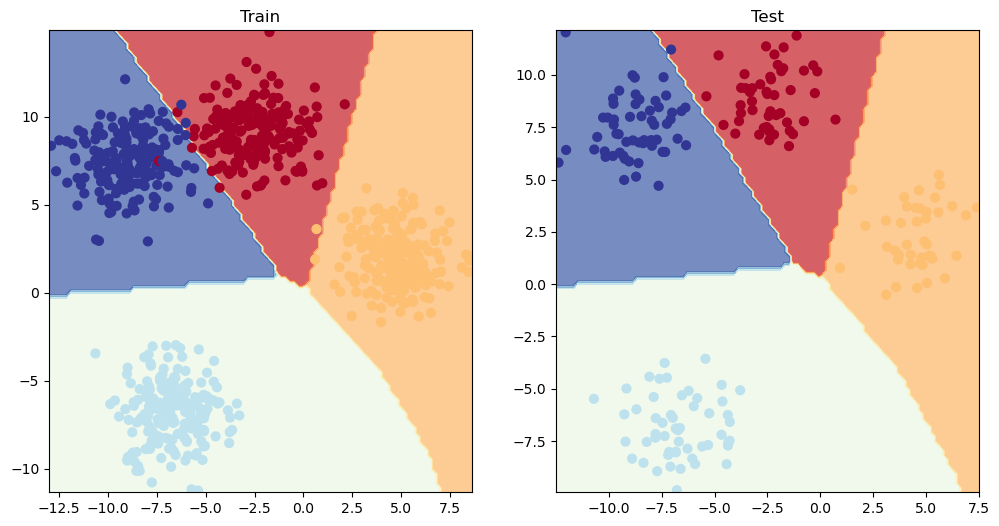

In [89]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_5, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_5, X_blob_test, y_blob_test)

## 10 More classification evaluation metrics
So far we've only covered a couple of ways of evaluating a classification model (accuracy, loss and visualizing predictions).

These are some of the most common methods you'll come across and are a good starting point.

However, you may want to evaluate your classification model using more metrics such as the following:

* Accuracy
* Precision
* Recall
* F1 Score
* Confusion Matrix
* Classification Report

Let's try the torchmetrics.Accuracy metric out.

In [90]:
try:
    from torchmetrics import Accuracy
except:
    !conda install torchmetrics==0.9.3 # this is the version we're using in this notebook (later versions exist here: https://torchmetrics.readthedocs.io/en/stable/generated/CHANGELOG.html#changelog)
    from torchmetrics import Accuracy

# Setup metric and make sure it's on the target device
torchmetrics_accuracy = Accuracy(task='multiclass', num_classes=4).to(device)

# Calculate accuracy
torchmetrics_accuracy(y_preds, y_blob_test)

tensor(0.9950, device='cuda:0')

## 11 Exercise
* Make Moons

[[-0.25355706  0.97635766]
 [ 0.01419721  0.34927645]
 [ 0.02450147  0.31528958]
 [ 0.23612532  0.98924419]
 [ 0.66595272  0.75017515]] [0 1 1 0 0]
Type of X: torch.FloatTensor
Type of y: torch.FloatTensor
Shape of X: torch.Size([5000, 2])
Shape of y: torch.Size([5000])
torch.Size([4000, 2]) torch.Size([1000, 2]) torch.Size([4000]) torch.Size([1000])
Epoch: 0 | Train Loss: 0.7099 | Train Accuracy 50.6% | Test Loss: 0.6881 | Test Accuracy 50.1%
Epoch: 100 | Train Loss: 0.2040 | Train Accuracy 90.9% | Test Loss: 0.1872 | Test Accuracy 91.9%
Epoch: 200 | Train Loss: 0.1275 | Train Accuracy 94.975% | Test Loss: 0.1150 | Test Accuracy 94.8%
Epoch: 300 | Train Loss: 0.0691 | Train Accuracy 98.35000000000001% | Test Loss: 0.0623 | Test Accuracy 98.4%
Epoch: 400 | Train Loss: 0.0371 | Train Accuracy 99.8% | Test Loss: 0.0338 | Test Accuracy 99.8%
tensor([0., 0., 0., 1., 1.], device='cuda:0') tensor([0., 0., 0., 1., 1.], device='cuda:0')


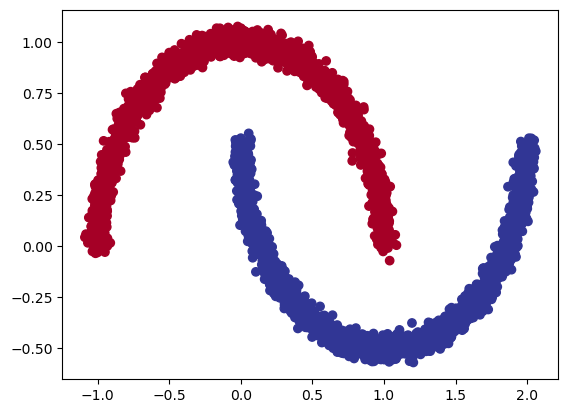

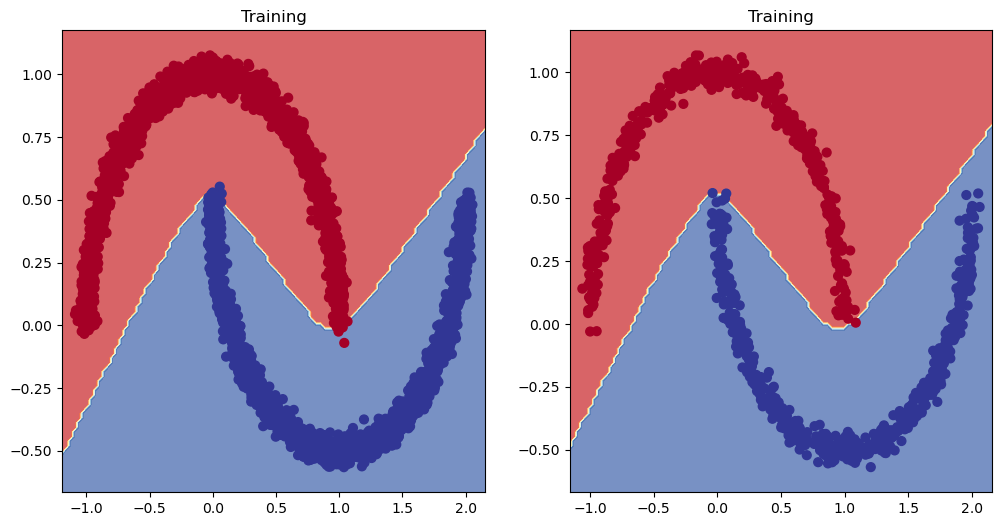

In [13]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import matplotlib.pyplot as plt
from helper_functions import plot_decision_boundary, accuracy_fn

# Device Agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"

# Creating our dataset
X, y = make_moons(n_samples=5000,
                  shuffle=True,
                  noise=0.03,
                  random_state=42)


print(X[:5], y[:5])

# Converting to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

print("Type of X:", X.type())
print("Type of y:", y.type())
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

# Visualizining our data
plt.scatter(x= X[:,0], y= X[:, 1], c=y, cmap=plt.cm.RdYlBu)

# Converting data into training and testing split
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42)

print(X_train.size(), X_test.size(), Y_train.size(), Y_test.size())


# Building our model
class MakeMoon(nn.Module):
    def __init__(self, input_channels, output_channels, hidden_units = 128) :
        super().__init__()

        self.all_layers = nn.Sequential(
            nn.Linear(in_features=input_channels, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_channels)
        )

    def forward(self, x):
        return self.all_layers(x)

# Creating instance of our model    
model_6 = MakeMoon(input_channels=2,
                   output_channels=1).to(device)

# Creating our loss function and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(params=model_6.parameters(),
                            lr=0.1)

# Converting our training and testing data to device
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)


# Building our training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 401

for epoch in range(epochs):
    model_6.train()

    logits = model_6(X_train).squeeze()
    preds = torch.round(torch.sigmoid(logits))

    loss = loss_fn(logits, Y_train)
    acc = accuracy_fn(y_true=Y_train, y_pred=preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_6.eval()
    with torch.inference_mode():
        test_logits = model_6(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, Y_test)
        test_acc = accuracy_fn(y_true=Y_test, y_pred= test_preds)

    if epoch%100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Train Accuracy {acc}% | Test Loss: {test_loss:.4f} | Test Accuracy {test_acc}%")



# Evaluating our model
model_6.eval()
with torch.inference_mode():
    y_logits = model_6(X_test).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logits))

print(y_preds[:5], Y_test[:5])

# Plotting decision boundary for our training and testing
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_6, X_train, Y_train)
plt.subplot(1,2,2)
plt.title("Training")
plot_decision_boundary(model_6, X_test, Y_test)







* Multiclassification with Spirals dataset

Type of X: torch.float32
Type of y: torch.int64
Shape of X: torch.Size([600, 2])
Shape of y: torch.Size([600])
torch.Size([480, 2]) torch.Size([120, 2]) torch.Size([480]) torch.Size([120])
Epoch: 0 | Train Loss: 1.4409 | Train Accuracy 0.0% | Test Loss: 1.3728 | Test Accuracy 35.0%
Epoch: 100 | Train Loss: 0.6597 | Train Accuracy 58.12500000000001% | Test Loss: 0.7088 | Test Accuracy 55.833333333333336%
Epoch: 200 | Train Loss: 0.5355 | Train Accuracy 70.625% | Test Loss: 0.6022 | Test Accuracy 63.33333333333333%
Epoch: 300 | Train Loss: 0.4015 | Train Accuracy 79.16666666666666% | Test Loss: 0.4724 | Test Accuracy 74.16666666666667%
Epoch: 400 | Train Loss: 0.2955 | Train Accuracy 87.29166666666667% | Test Loss: 0.3547 | Test Accuracy 84.16666666666667%
Epoch: 500 | Train Loss: 0.2238 | Train Accuracy 92.29166666666667% | Test Loss: 0.2682 | Test Accuracy 89.16666666666667%
Epoch: 600 | Train Loss: 0.1772 | Train Accuracy 94.79166666666666% | Test Loss: 0.2131 | Test Accuracy 91.66666

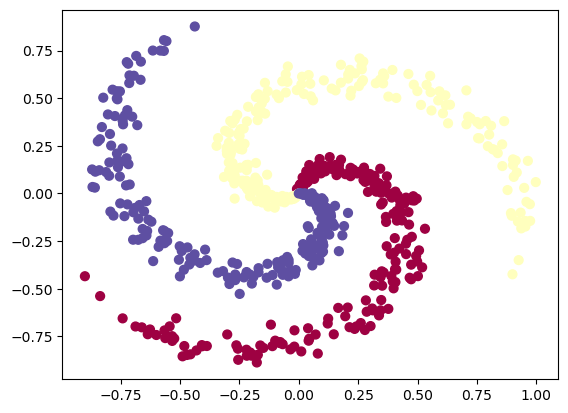

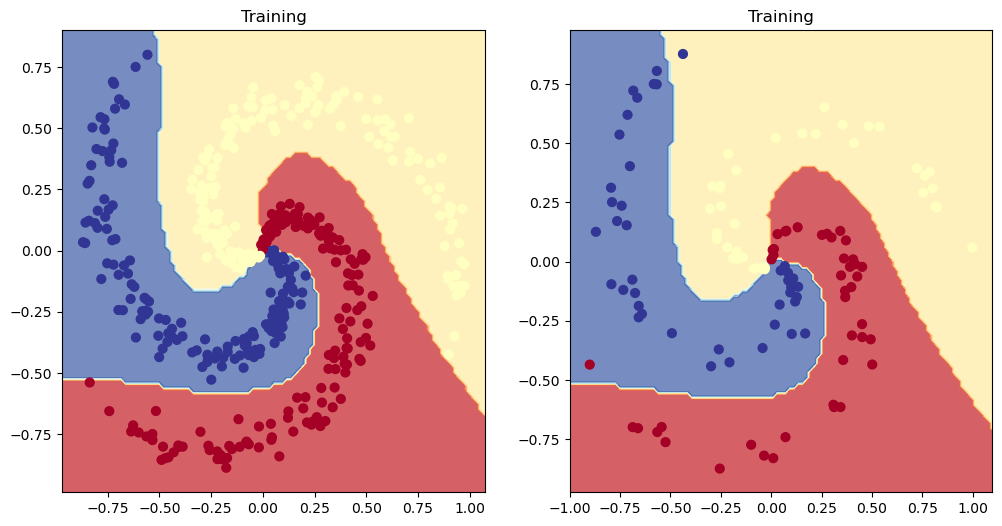

In [1]:
from sklearn.model_selection import train_test_split
import torch
from torch import nn
import matplotlib.pyplot as plt
from helper_functions import plot_decision_boundary, accuracy_fn

# Device Agnostic Code
device = "cuda" if torch.cuda.is_available() else "cpu"


# Code for creating a spiral dataset from CS231n
import numpy as np
N = 200 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)

# Converting to tensors
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.LongTensor)


print("Type of X:", X.dtype)
print("Type of y:", y.dtype)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


# Converting data into training and testing split
X_train, X_test, Y_train, Y_test = train_test_split(X, 
                                                    y, 
                                                    shuffle=True,
                                                    test_size=0.2, 
                                                    random_state=42)

print(X_train.size(), X_test.size(), Y_train.size(), Y_test.size())


# Building our model
class Spirals(nn.Module):
    def __init__(self, input_channels, output_channels, hidden_units = 128) :
        super().__init__()

        self.all_layers = nn.Sequential(
            nn.Linear(in_features=input_channels, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_channels)
        )

    def forward(self, x):
        return self.all_layers(x)

# Creating instance of our model    
model_7 = Spirals(input_channels=2,
                   output_channels=4).to(device)

# Creating our loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_7.parameters(),
                            lr=0.1)

# Converting our training and testing data to device
X_train, Y_train = X_train.to(device), Y_train.to(device)
X_test, Y_test = X_test.to(device), Y_test.to(device)


# Building our training loop
torch.manual_seed(42)
torch.cuda.manual_seed(42)

epochs = 1001

for epoch in range(epochs):
    model_7.train()

    logits = model_7(X_train)
    preds = torch.softmax(logits, dim=1).argmax(dim=1)

    loss = loss_fn(logits, Y_train)
    acc = accuracy_fn(y_true=Y_train, y_pred=preds)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    model_7.eval()
    with torch.inference_mode():
        test_logits = model_7(X_test)
        test_preds = torch.softmax(test_logits, dim=1).argmax(dim=1)

        test_loss = loss_fn(test_logits, Y_test)
        test_acc = accuracy_fn(y_true=Y_test, y_pred= test_preds)

    if epoch%100 == 0:
        print(f"Epoch: {epoch} | Train Loss: {loss:.4f} | Train Accuracy {acc}% | Test Loss: {test_loss:.4f} | Test Accuracy {test_acc}%")



# Evaluating our model
model_7.eval()
with torch.inference_mode():
    y_logits = model_7(X_test)
    y_preds = torch.softmax(y_logits, dim=1).argmax(dim=1)

print(y_preds[:5], Y_test[:5])

# Plotting decision boundary for our training and testing
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_7, X_train, Y_train)
plt.subplot(1,2,2)
plt.title("Training")
plot_decision_boundary(model_7, X_test, Y_test)

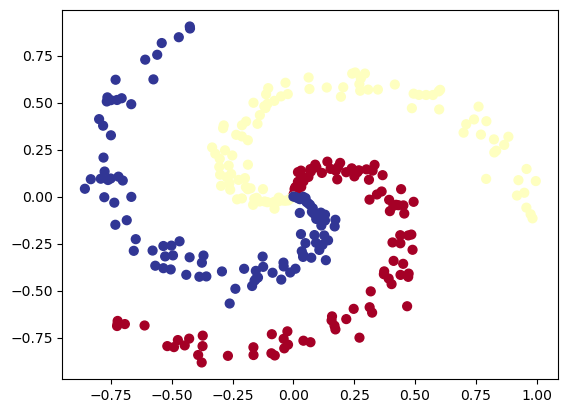

In [5]:
# Code for creating a spiral dataset from CS231n
import numpy as np
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
plt.show()

In [6]:
# Turn data into tensors
X = torch.from_numpy(X).type(torch.float) # features as float32
y = torch.from_numpy(y).type(torch.LongTensor) # labels need to be of type long

# Create train and test splits
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)
len(X_train), len(X_test), len(y_train), len(y_test)
     
(240, 60, 240, 60)


from torchmetrics import Accuracy
acc_fn = Accuracy(task="multiclass", num_classes=3).to(device) # send accuracy function to device
acc_fn

MulticlassAccuracy()

In [7]:
# Prepare device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"

class SpiralModel(nn.Module): 
  def __init__(self):
    super().__init__()
    self.linear1 = nn.Linear(in_features=2, out_features=10)
    self.linear2 = nn.Linear(in_features=10, out_features=10)
    self.linear3 = nn.Linear(in_features=10, out_features=3)
    self.relu = nn.ReLU()

  def forward(self, x):
    return self.linear3(self.relu(self.linear2(self.relu(self.linear1(x)))))

model_1 = SpiralModel().to(device)
model_1

SpiralModel(
  (linear1): Linear(in_features=2, out_features=10, bias=True)
  (linear2): Linear(in_features=10, out_features=10, bias=True)
  (linear3): Linear(in_features=10, out_features=3, bias=True)
  (relu): ReLU()
)

In [8]:
# Setup data to be device agnostic
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)
print(X_train.dtype, X_test.dtype, y_train.dtype, y_test.dtype)

# Print out untrained model outputs
print("Logits:")
print(model_1(X_train)[:10])

print("Pred probs:")
print(torch.softmax(model_1(X_train)[:10], dim=1))

print("Pred labels:")
print(torch.softmax(model_1(X_train)[:10], dim=1).argmax(dim=1))

torch.float32 torch.float32 torch.int64 torch.int64
Logits:
tensor([[-0.2160, -0.0600,  0.2256],
        [-0.2020, -0.0530,  0.2257],
        [-0.2223, -0.0604,  0.2384],
        [-0.2174, -0.0555,  0.2826],
        [-0.2201, -0.0502,  0.2792],
        [-0.2195, -0.0565,  0.2457],
        [-0.2212, -0.0581,  0.2440],
        [-0.2251, -0.0631,  0.2354],
        [-0.2116, -0.0548,  0.2336],
        [-0.2170, -0.0552,  0.2842]], device='cuda:0',
       grad_fn=<SliceBackward0>)
Pred probs:
tensor([[0.2685, 0.3139, 0.4176],
        [0.2707, 0.3142, 0.4151],
        [0.2659, 0.3126, 0.4215],
        [0.2615, 0.3074, 0.4311],
        [0.2609, 0.3092, 0.4299],
        [0.2653, 0.3123, 0.4224],
        [0.2653, 0.3123, 0.4224],
        [0.2659, 0.3127, 0.4214],
        [0.2681, 0.3136, 0.4184],
        [0.2614, 0.3072, 0.4314]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Pred labels:
tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:0')


In [9]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(),
                             lr=0.02)

In [10]:
# Build a training loop for the model
epochs = 1000

# Loop over data
for epoch in range(epochs):
  ## Training
  model_1.train()
  # 1. forward pass
  y_logits = model_1(X_train)
  y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)

  # 2. calculate the loss
  loss = loss_fn(y_logits, y_train)
  acc = acc_fn(y_pred, y_train)
  
  # 3. optimizer zero grad
  optimizer.zero_grad()

  # 4. loss backwards
  loss.backward()

  # 5. optimizer step step step
  optimizer.step()

  ## Testing
  model_1.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_1(X_test)
    test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
    # 2. Caculate loss and acc
    test_loss = loss_fn(test_logits, y_test)
    test_acc = acc_fn(test_pred, y_test)

  # Print out what's happening
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.2f} Acc: {acc:.2f} | Test loss: {test_loss:.2f} Test acc: {test_acc:.2f}")

Epoch: 0 | Loss: 1.12 Acc: 0.32 | Test loss: 1.10 Test acc: 0.37
Epoch: 100 | Loss: 0.45 Acc: 0.78 | Test loss: 0.53 Test acc: 0.68
Epoch: 200 | Loss: 0.12 Acc: 0.96 | Test loss: 0.09 Test acc: 0.98
Epoch: 300 | Loss: 0.07 Acc: 0.98 | Test loss: 0.02 Test acc: 1.00
Epoch: 400 | Loss: 0.05 Acc: 0.98 | Test loss: 0.01 Test acc: 1.00
Epoch: 500 | Loss: 0.04 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 600 | Loss: 0.03 Acc: 0.99 | Test loss: 0.01 Test acc: 1.00
Epoch: 700 | Loss: 0.03 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 800 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00
Epoch: 900 | Loss: 0.02 Acc: 0.99 | Test loss: 0.00 Test acc: 1.00


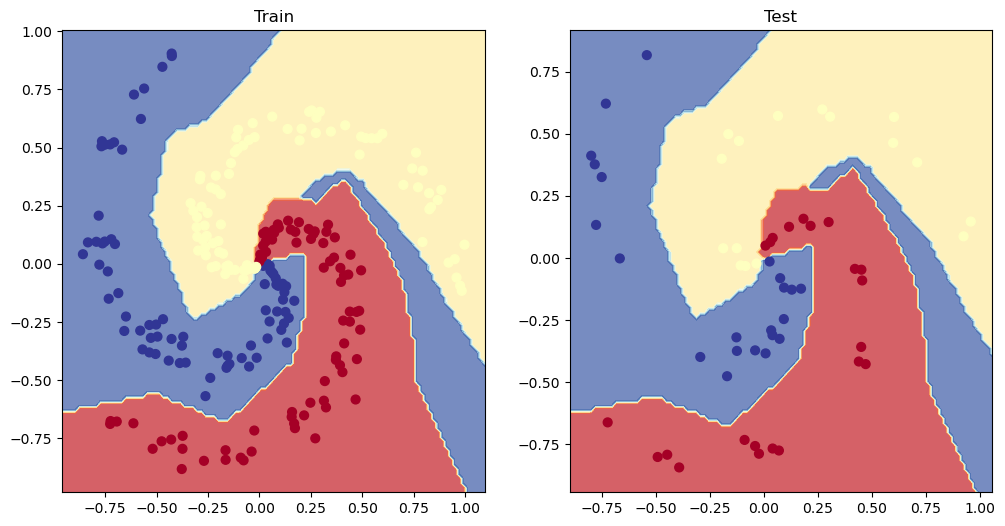

In [11]:

# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)